# Introducción al Machine Learning - Ricardo Talavera Data Scientist
## Modelos lineales para regresión, muestreo y selección del mejor modelo

### Propósito de la actividad

En esta pondremos en práctica, con un conjunto de datos reales, nuestra habilidad para implementar modelos lineales y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, implementaremos modelos lineales de componentes principales, Ridge y partial least squares y regularización.


### Pasos generales

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. 

Estimación del modelo usando componentes principales: Se estima el modelo usando componentes principales, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado.

Estimación del modelo usando PCA y el método forward: Se estima el modelo usando el método forward con componentes principales, se responde si es el mismo modelo que el anterior, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. 

Estimación del modelo de partial least squares: Se estima el modelo usando partial least squares, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado.

Estimación de un modelo de penalización: Se estima algún modelo de penalización, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección.  


### Datos

Existe gran variedad de bases de datos reales disponibles en internet usadas por la comunidad académica para la evaluación de modelos predictivos.

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Hitters", la cual contiene 20 variables de jugadores de la Major League Baseball en las temporadas de 1986 y 1987. De esta manera, el objetivo de la actividad es predecir el salario de un jugador basado en las características que describen las variables predictivas.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-hitters

Finalmente, para resolver los puntos de esta actividad deberán tener en cuenta únicamente las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### 1. Análisis preliminar de variables 
Realizamos un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
link="https://r-data.pmagunia.com/system/files/datasets/dataset-87300.csv"
import pandas as pd
data=pd.read_csv(link)
## Modelos lineales para regresión, muestreo y selección del mejor modelo
data.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

Eliminamos las variables que no son cuantitativas, podemos usar un drop, pero muestro otra forma :

In [3]:
data=data[[col for col in data.columns if col not in ["League","Division","NewLeague"]]]

In [4]:
data.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0


Observamos los nas

In [142]:
data.isna().sum()

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64

Los extraemos no son significativos :

In [5]:
data.dropna(axis=0, inplace = True)
data.isna().sum()

AtBat      0
Hits       0
HmRun      0
Runs       0
RBI        0
Walks      0
Years      0
CAtBat     0
CHits      0
CHmRun     0
CRuns      0
CRBI       0
CWalks     0
PutOuts    0
Assists    0
Errors     0
Salary     0
dtype: int64

Una forma de extraer los histogramas :

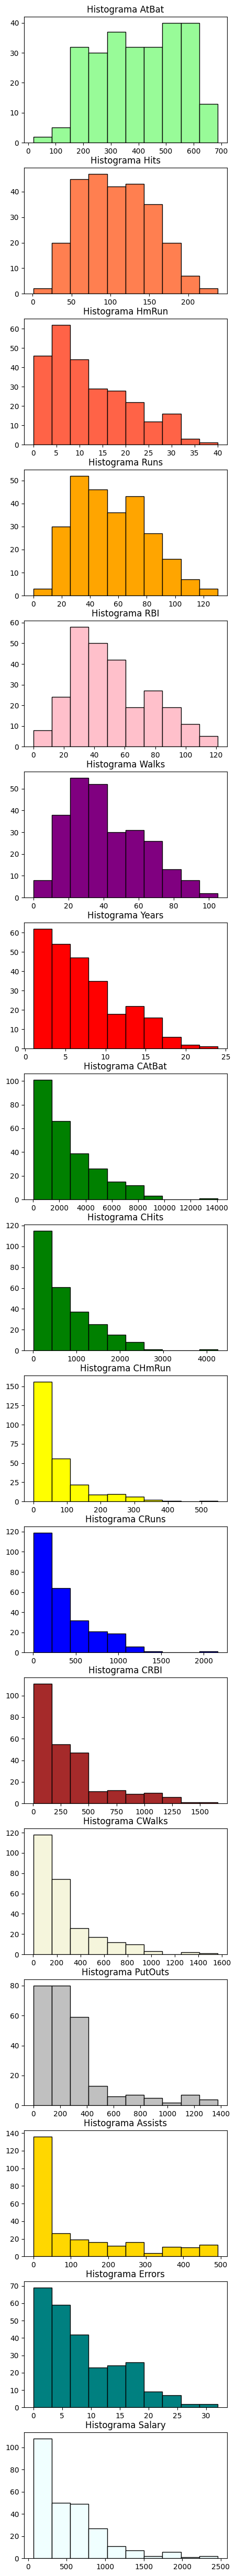

In [6]:
import matplotlib.pyplot as plt
colores=["palegreen","coral","tomato","orange","pink","purple","red","green","green","yellow","blue","brown","beige","silver",
        "gold","teal","azure"]
fig, ax = plt.subplots(nrows=data.shape[1],ncols=1,figsize=(5,35))
fig.subplots_adjust(top=1.5)
for i,col in enumerate(data.columns):

  ax[i].hist(data[col],color=colores[i],ec="black")
  ax[i].set_title(f"Histograma {col}")
    

Otra forma de extraer histogramas pero en conjunto con tendencias:

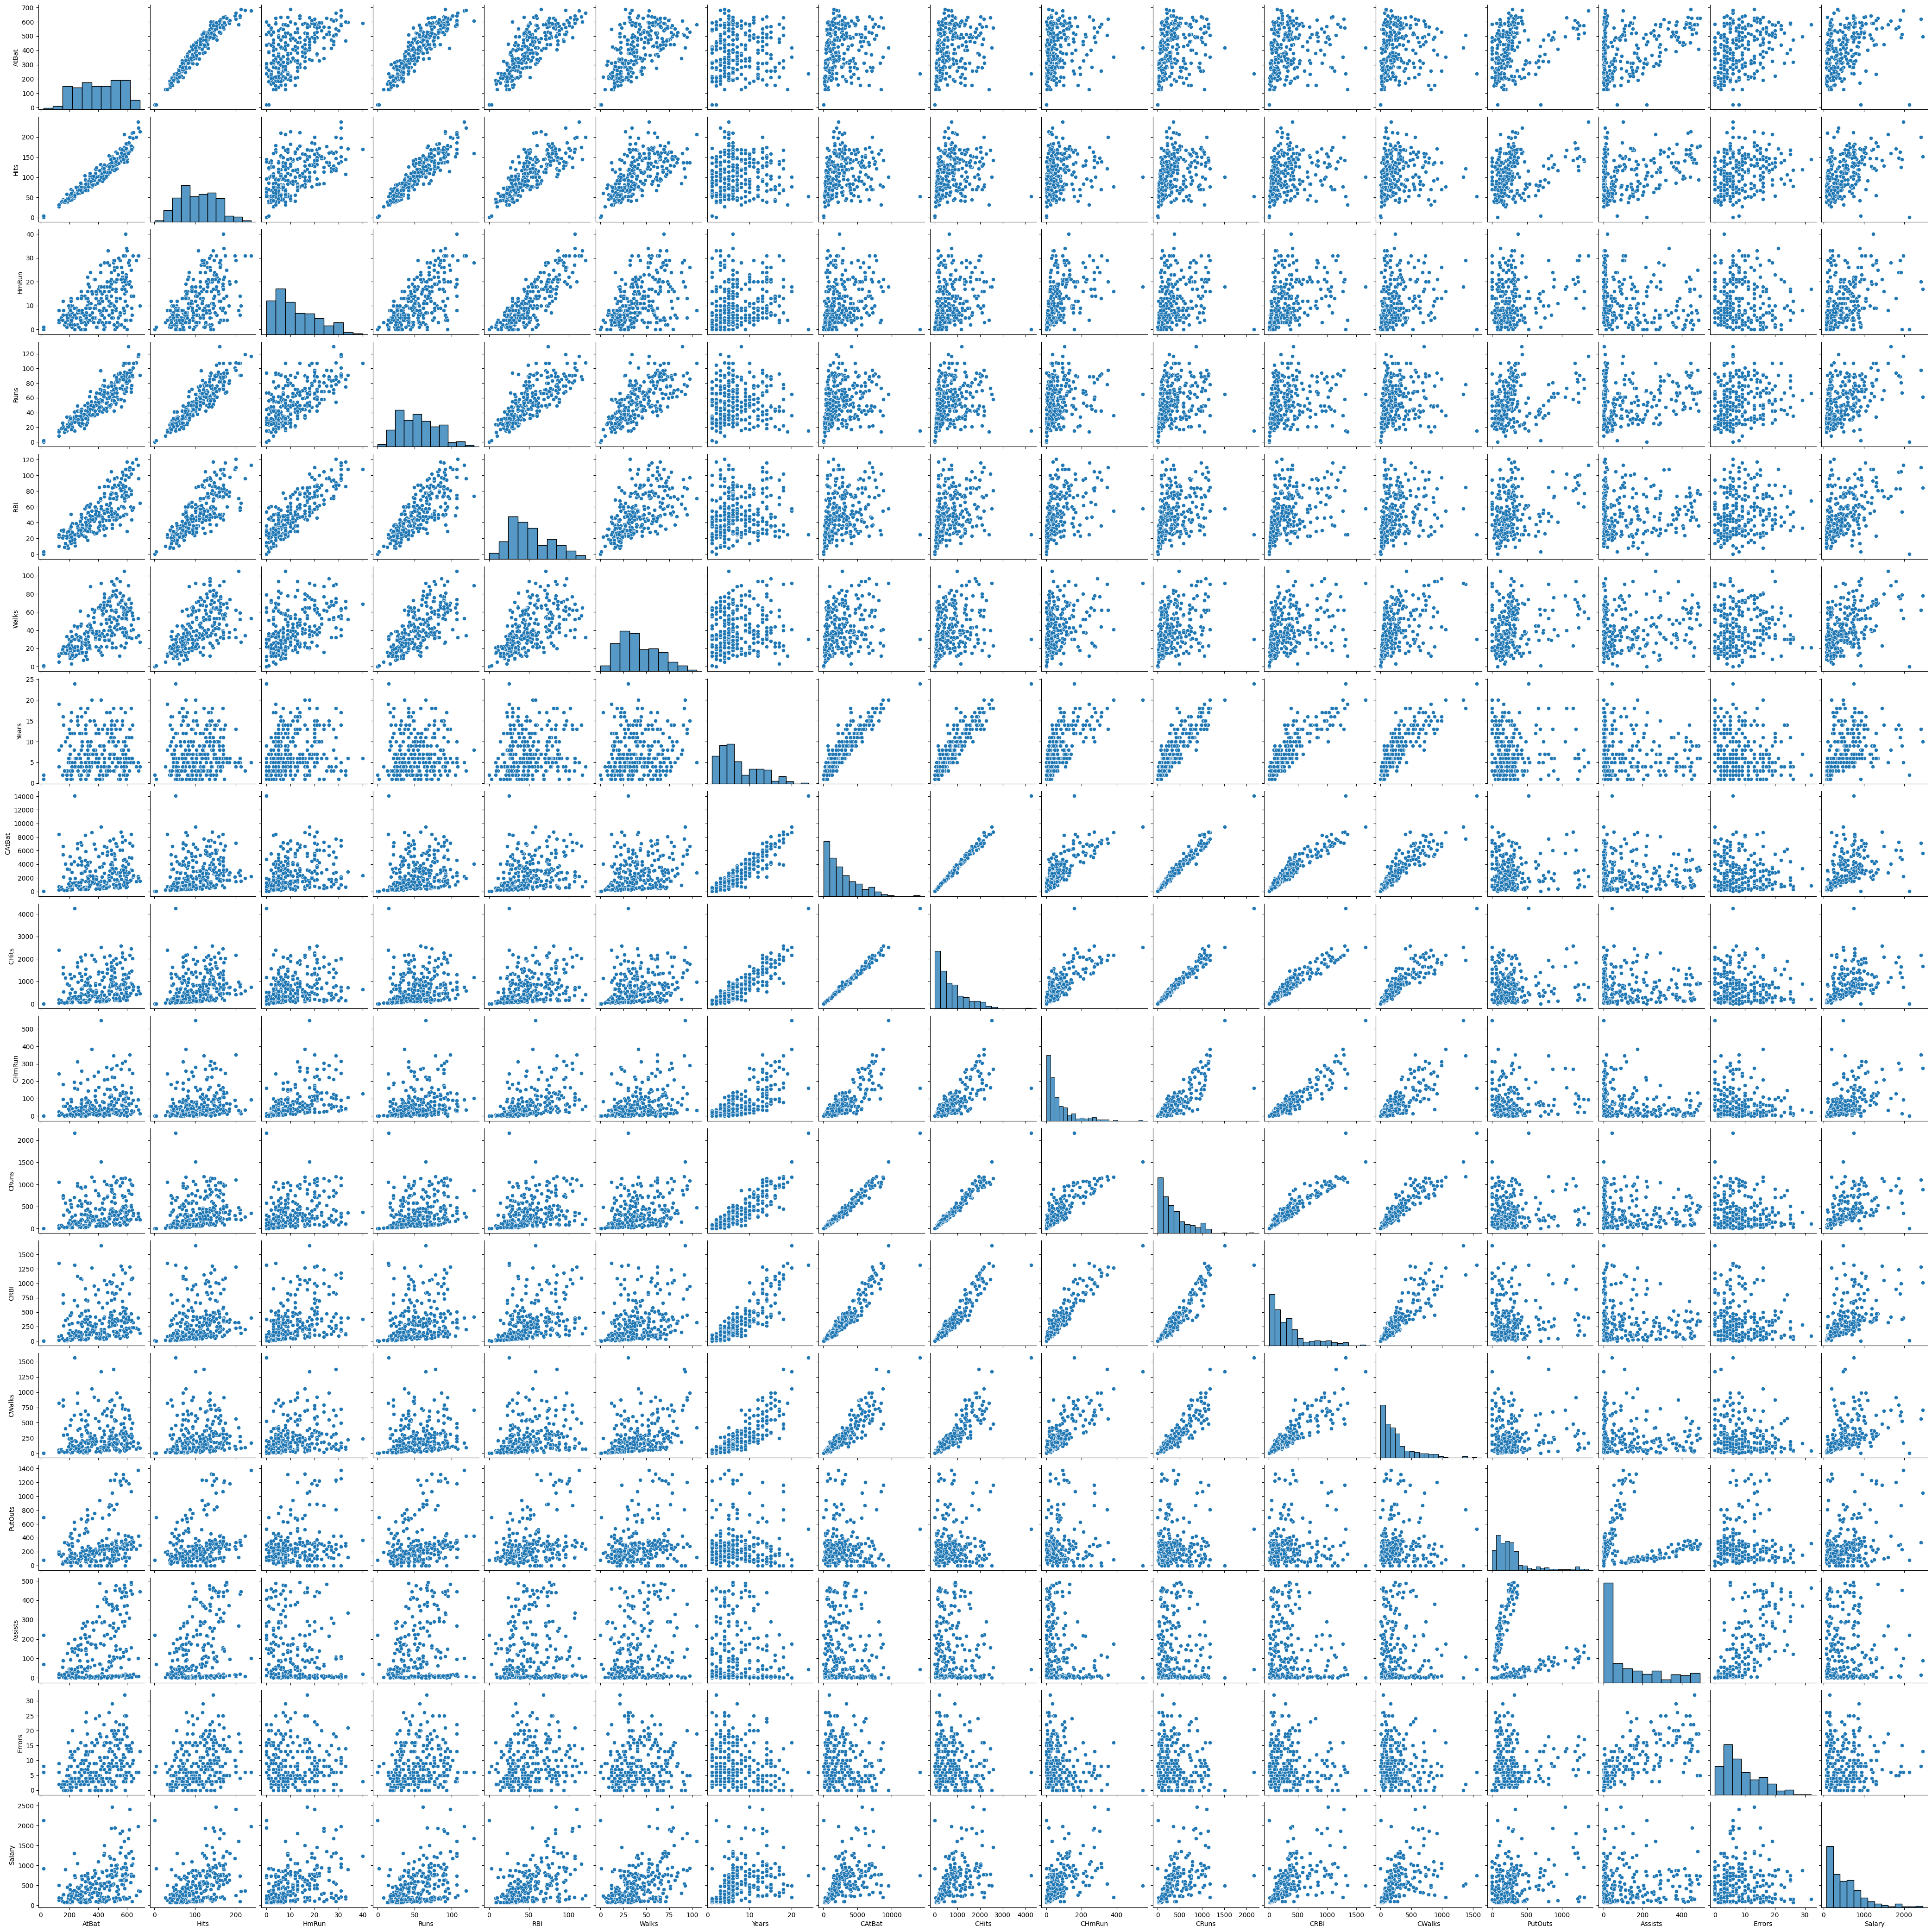

In [12]:
import seaborn as sns
sns.pairplot(data)
plt.show()

Chequeamos la matriz de correlaciones y vemos que no estan amigable :

In [8]:
corr = data.corr()
corr

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.309607,0.342117,0.325577,0.394771
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.299688,0.303975,0.279876,0.438675
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.250931,-0.161602,-0.009743,0.343028
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.271160,0.179258,0.192609,0.419859
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.312065,0.062902,0.150155,0.449457
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.280855,0.102523,0.081937,0.443867
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,-0.020019,-0.085118,-0.156512,0.400657
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.053393,-0.007897,-0.070478,0.526135
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.067348,-0.013144,-0.068036,0.548910
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.093822,-0.188886,-0.165369,0.524931


Mejor un mapa de calor para ver la multicolinealidad presente :

<AxesSubplot: >

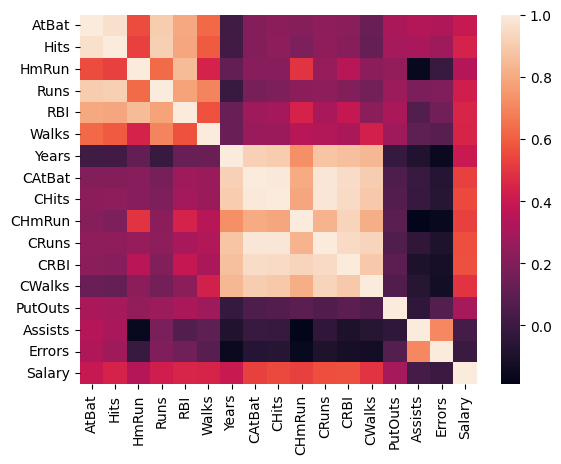

In [9]:
import seaborn as sns
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### 2. Estimación del modelo usando componentes principales 
Estimaremos un modelo predictivo usando la muestra de entrenamiento usando la libreria de python de componentes principales y evalúaremos su desempeño en la muestra de test.

In [10]:
data.shape

(263, 17)

Separando predictores de la variable a predecir :

In [11]:
X=data.iloc[:,0:16]
Y=data.iloc[:,16:17]

In [12]:
Y.head(2)

,Salary
-Alan Ashby,475.0
-Alvin Davis,480.0


In [13]:
X.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14


In [14]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42)


In [15]:
#Estandarizamos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
#no deseaos que me transforme los datos solo que conozca mi data y me traiga la varianza por componente

pca = PCA().fit(x_train_st)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.47470447e-01, 2.58183236e-01, 1.09474738e-01, 5.54398413e-02,
       4.22118184e-02, 3.51728537e-02, 1.73507392e-02, 1.11684652e-02,
       7.91750554e-03, 5.80259171e-03, 3.91970473e-03, 2.91049651e-03,
       1.95899117e-03, 7.26197273e-04, 2.33118199e-04, 5.92563375e-05])

In [17]:
import numpy as np
var_acum = np.cumsum(explained_variance)
var_acum

array([0.44747045, 0.70565368, 0.81512842, 0.87056826, 0.91278008,
       0.94795293, 0.96530367, 0.97647214, 0.98438964, 0.99019224,
       0.99411194, 0.99702244, 0.99898143, 0.99970763, 0.99994074,
       1.        ])

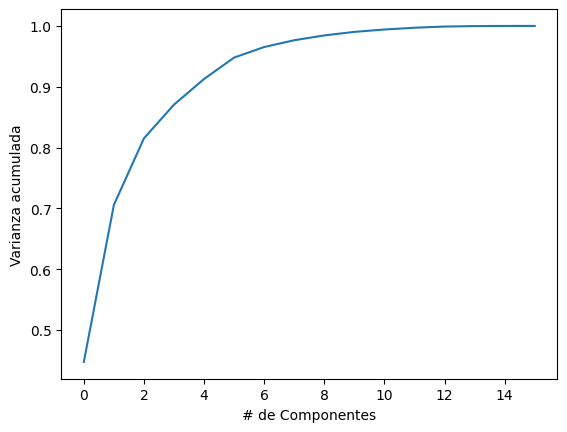

In [18]:
plt.plot(var_acum)
plt.xlabel("# de Componentes")
plt.ylabel("Varianza acumulada")
plt.show()

In [19]:
pca_5=PCA(n_components=5)
pca_comps=pca_5.fit_transform(x_train_st) #aqui guarda los componentes de MP para la regresion lineal
#La data de test tambien tendra que pasar por este camino pero solo transform
pca_comps_test=pca_5.transform(x_test_st)

In [20]:
print(pca_5.components_)
print(pca_5.components_.shape)

[[ 1.90310708e-01  1.85516255e-01  2.05747852e-01  1.83336458e-01
   2.24155214e-01  1.90717137e-01  2.92323395e-01  3.36575499e-01
   3.34855486e-01  3.26036266e-01  3.42466934e-01  3.47719458e-01
   3.24158702e-01  7.96877504e-02  2.51419801e-04 -4.14341818e-03]
 [-3.90567412e-01 -3.86012615e-01 -2.49082377e-01 -3.89686626e-01
  -3.27135527e-01 -2.57753465e-01  2.50930453e-01  1.83950376e-01
   1.76934927e-01  1.15252368e-01  1.68809540e-01  1.55712591e-01
   1.85149996e-01 -1.71320222e-01 -1.45112562e-01 -1.79650725e-01]
 [ 1.06210069e-01  8.21017836e-02 -3.29551389e-01 -7.31935137e-02
  -1.36815699e-01 -1.12216224e-01  9.26058362e-02  1.20862375e-01
   1.19634998e-01 -1.14089581e-01  7.17031902e-02  1.62118714e-02
   2.16430466e-02 -9.70590263e-02  6.58880939e-01  5.80324593e-01]
 [-8.38431116e-02 -7.34639059e-02 -2.44746122e-02 -1.81684677e-01
  -1.41234520e-03 -1.45593635e-01 -4.17661543e-03  1.95442956e-02
   3.30420493e-02  1.02962289e-02 -1.31345712e-02  4.26508237e-02
  -2.46

In [21]:
y_train.shape

(184, 1)

In [22]:
# Entrenar un modelo de regresión lineal
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(pca_comps, y_train)

LinearRegression()

In [23]:
#Prediccion
y_pred = regressor.predict(pca_comps_test)

In [24]:
# Evaluar el modelo
score = regressor.score(pca_comps_test, y_test)
print("Precisión: ", score)

Precisión:  0.3203137496737778


### 3. Estimación del modelo usando PCA y el método forward
Ahora construiremos nuestro propio algoritmo para hacer una regresión por componentes principales, en donde primero calculemos los componentes y después realizamos un proceso de selección de variables secuencial (forward) que nos permita encontrar el mejor modelo. Todo lo anterior en la muestra de entrenamiento.

Finalmente, evalúaremos el desempeño en test.

In [26]:
def calcula_pca(Xtrain,Xtest,var_acum):
    media_train = np.mean(Xtrain, axis=0)
    media_test = np.mean(Xtest, axis=0)
    sd_train = np.std(Xtrain, axis=0)
    sd_test = np.std(Xtest, axis=0)
    X_train_st = (Xtrain - media_train)/sd_train
    X_test_st = (Xtest - media_test)/sd_test
    #debemos generar la matriz de varianzas y covarianzas
    sigma = np.cov(X_train_st.T)
    autovalores, autovectores = np.linalg.eig(sigma)
    autovectores=autovectores.T
    n_components=0
    sum_var = 0
    for j in autovalores:
        sum_var = sum_var+j/sum(autovalores)
        if sum_var > var_acum:
            n_components+=1
            break
        else:
           n_components+=1
    autovectores = autovectores[np.argsort(-autovalores)][:n_components]
    X_pca_train = X_train_st @ autovectores.T
    X_pca_test = X_test_st @ autovectores.T

    return n_components,X_pca_train, X_pca_test, autovectores, autovalores



In [27]:
calcula_pca(x_train,x_test,0.9)

(5,
                            0         1         2         3         4
 -Kirk Gibson        1.759387 -1.352657  2.068270  0.972897  0.413457
 -Keith Moreland     1.452217 -1.224684  0.788979  0.846459 -0.525052
 -Darryl Strawberry  0.995231 -2.132193  1.831169  0.751670  0.610558
 -Andre Dawson       3.521033  0.420989  0.953759  0.495684  0.659442
 -Jeff Reed         -3.905588  2.111006  0.831357 -0.663581 -0.258266
 ...                      ...       ...       ...       ...       ...
 -Bill Buckner       5.825457 -0.606425 -1.082856 -2.411697  0.287780
 -Pete Rose          7.939225  7.461450 -1.872383 -1.475088 -1.676226
 -Danny Tartabull   -0.415628 -2.907585  1.570456  0.908160  0.774058
 -Juan Beniquez      0.915291  1.482986 -0.829793 -0.038015 -0.272641
 -Harold Reynolds   -2.543279 -0.668314 -2.543410 -0.099108 -0.315466
 
 [184 rows x 5 columns],
                          0         1         2         3         4
 -Jim Gantner      0.443309  0.224216 -1.599075 -0.065329 -0.

La siguiente función de regresión hacia adelante en Python. Está utilizando la biblioteca scikit-learn para ajustar un modelo de regresión lineal y seleccionar características en un proceso iterativo. La función toma como entrada los datos de entrenamiento X_train e Y_train, así como algunos valores opcionales iniciales como lista_w, score y times. La función realiza un bucle sobre todas las columnas de X_train, agregando una columna a la vez a lista_w y ajustando un modelo de regresión lineal. Si el score del modelo ajustado con la nueva columna es mayor que el score anterior, se actualiza el valor de score y lista_w. Al final, si tiempo es igual al número de columnas de X_train, la función imprime los valores de score, lista_w y tiempo y devuelve lista_w. De lo contrario, la función se llama a sí misma con los valores actualizados de lista_w y score.

In [28]:
def forward_regression(X_train,Y_train,lista_w=[],score=0,times=0):
    model = LinearRegression()
    columnas = list(X_train.columns)
    col_ini = lista_w.copy()
    tiempo= times+1
    for col in columnas:
        col_temp= col_ini.copy()
        if col not in col_ini:
            col_temp.append(col)
            X_selected = X_train[col_temp]
            model.fit(X_selected, Y_train)
            score_now = model.score(X_selected, Y_train)
            if score_now > score:
               score = score_now
               lista_w=col_temp
               
            else:
                pass
        else:
            pass
    if tiempo==X_train.shape[1]:
        print("acabando")
        print (f"score = {score}")
        print (f"lista_w = {lista_w}")
        print (f"Tiempo = {tiempo}")
        X_selected = X_train[lista_w]
        modelo= model.fit(X_selected, Y_train)
        return modelo
    else:
        print (f"score = {score}")
        print (f"lista_w = {lista_w}")
        print (f"Tiempo = {tiempo}")
        return forward_regression(X_train,Y_train,lista_w=lista_w,score=score,times=tiempo)

In [29]:
# Calcular componentes principales
n_components,X_pca_train, X_pca_test, autovectores, autovalores = calcula_pca(x_train,x_test,0.9)
X_pca_train.columns=["C1","C2","C3","C4","C5"]

# Selección de variables secuencial
modelo=forward_regression(X_pca_train,y_train,lista_w=[],score=0,times=0)

Ypred2 = modelo.predict(X_pca_test)

score = 0.4485558616041825
lista_w = ['C1']
Tiempo = 1
score = 0.47587623623937003
lista_w = ['C1', 'C2']
Tiempo = 2
score = 0.4991954523262031
lista_w = ['C1', 'C2', 'C4']
Tiempo = 3
score = 0.5075129430672878
lista_w = ['C1', 'C2', 'C4', 'C5']
Tiempo = 4
acabando
score = 0.5090442029698119
lista_w = ['C1', 'C2', 'C4', 'C5', 'C3']
Tiempo = 5


c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
# Evaluar el modelo
score = modelo.score(X_pca_test, y_test)
print("Precisión: ", score)

Precisión:  0.2921846006923269


c:\Users\Ricardo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación del modelo de partial least squares
Usaemos partial least squares y evalúaremos en la muestra de test. Concluiremos sobre el poder predictivo del modelo estimado.

In [31]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pls = PLSRegression()
pls.fit(x_train, y_train)
Y_pred = pls.predict(x_test)
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, Y_pred)
r2

0.2996071374587338

La regresión PLS (Partial Least Squares Regression) se diferencia de la regresión convencional en varios aspectos:

Enfoque: La regresión PLS se enfoca en la relación entre las variables predictoras y la variable de respuesta, mientras que la regresión convencional se enfoca en el ajuste lineal entre las variables predictoras y la variable de respuesta.

Número de variables: La regresión PLS es adecuada para problemas con un gran número de variables predictoras y una sola variable de respuesta, mientras que la regresión convencional puede manejar un número limitado de variables predictoras.

Reducción de dimensionalidad: La regresión PLS reduce la dimensionalidad de los datos mediante la creación de componentes latentes que describen la relación entre las variables predictoras y la variable de respuesta. La regresión convencional no tiene en cuenta la reducción de dimensionalidad.

Análisis multicolinealidad: La regresión PLS puede manejar la multicolinealidad entre las variables predictoras, mientras que la regresión convencional puede verse afectada por la multicolinealidad.

Sensibilidad a los outliers: La regresión PLS es menos sensible a los outliers que la regresión convencional.



(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Estimación de un modelo de penalización
Finalmente usaremos un modelo de penalización y evalúaremos en la muestra de test. Concluiremos sobre el poder predictivo del modelo estimado.

Usaremos RIDGE :

El hiperparámetro alpha en Ridge Regression controla la magnitud de la penalización que se aplica a los coeficientes del modelo. Un valor alto de alpha implica una penalización más fuerte y, por lo tanto, coeficientes más pequeños. Un valor de alpha de cero equivale a una Regresión Lineal Ordinaria sin penalización. Una penalización más suave ayuda a evitar el sobreajuste de los datos de entrenamiento y mejora la capacidad de generalización del modelo.

En general, los valores típicos de alpha van desde 0.1 hasta 100, dependiendo de la cantidad de datos, la complejidad del modelo y otros factores. La elección óptima de alpha se puede determinar a través de la validación cruzada o por la optimización de un criterio de selección como la AIC o la BIC.

In [32]:
x_train.shape

(184, 16)

In [33]:
y_train.shape

(184, 1)

In [34]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
import numpy as np


In [35]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloRidge = RidgeCV(alphas=alphasCalibrar,store_cv_values=True).fit(x_train, y_train)

In [36]:
print('El parámetro de penalización óptimo es:')
print(modeloRidge.alpha_)
print('El valor del R^2 es:')
print(modeloRidge.score(x_train, y_train))
print('Los coeficientes estimados son:')
print(modeloRidge.coef_)

El parámetro de penalización óptimo es:
100.0
El valor del R^2 es:
0.5820489609647441
Los coeficientes estimados son:
[[-1.53177519  7.18683295  7.35909118 -1.31249705 -2.20465861  3.90348069
  14.8028759  -0.3458497   0.42001065 -0.36563749  1.67119101  0.82038835
  -0.55838278  0.31589877  0.35480066 -1.41389214]]


In [37]:
y_pred_ridge= modeloRidge.predict(x_test)
r2 = r2_score(y_test, y_pred_ridge)
r2

0.38787158809917743